In [42]:
'''Assignment 10 : Firstly we initialized the importing the tensorflow and keras with Elements and then queru-ying data from 
Pymatgen and mendeleev then 
Part 1: with variable optimisers we will learn the best optimiser
Part 2 :with variable learning rate we will learn the best learning rate
Part 3: with variable activation function we will learn the best range of data


  optimizer is modified based on the version 2.0 requirements
'''


'Assignment 10 : Firstly we initialized the importing the tensorflow and keras with Elements and then queru-ying data from \nPymatgen and mendeleev then \nPart 1: with variable optimisers we will learn the best optimiser\nPart 2 :with variable learning rate we will learn the best learning rate\nPart 3: with variable activation function we will learn the best range of data\n\n\n  optimizer is modified based on the version 2.0 requirements\n'

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential

import pymatgen.core as pymat
import mendeleev as mendel
import pandas as pd
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt
import sys

fcc_elements = ["Ag", "Al", "Au", "Cu", "Ir", "Ni", "Pb", "Pd", "Pt", "Rh", "Th", "Yb"]
bcc_elements = ["Ba", "Ca", "Cr", "Cs", "Eu", "Fe", "Li", "Mn", "Mo", "Na", "Nb", "Rb", "Ta", "V", "W" ]
hcp_elements = ["Be", "Cd", "Co", "Dy", "Er", "Gd", "Hf", "Ho", "Lu", "Mg", "Re", 
                "Ru", "Sc", "Tb", "Ti", "Tl", "Tm", "Y", "Zn", "Zr"]

elements = fcc_elements + bcc_elements + hcp_elements

random.Random(1).shuffle(elements)


querable_mendeleev = ["atomic_number", "atomic_volume", "boiling_point", "en_ghosh",  "evaporation_heat", "heat_of_formation",
                     "lattice_constant", "melting_point", "specific_heat"]
querable_pymatgen = ["atomic_mass", "atomic_radius", "electrical_resistivity","molar_volume", "bulk_modulus", "youngs_modulus",
                     "average_ionic_radius", "density_of_solid", "coefficient_of_linear_thermal_expansion"]
querable_values = querable_mendeleev + querable_pymatgen

In [4]:
all_values = []
all_labels = []

for item in elements:
    element_values = []
    
   
    element_object = mendel.element(item)
    for i in querable_mendeleev:    
        element_values.append(getattr(element_object,i))

    element_object = pymat.Element(item)    
    for i in querable_pymatgen:
        element_values.append(getattr(element_object,i))
        
    all_values.append(element_values) # All lists are appended to another list, creating a List of Lists
    
    if (item in fcc_elements):
        all_labels.append([1, 0, 0]) # The crystal structure labels are assigned here
    elif (item in bcc_elements):
        all_labels.append([0, 1, 0]) # The crystal structure labels are assigned here
    elif (item in hcp_elements):
        all_labels.append([0, 0, 1]) # The crystal structure labels are assigned here



df = pd.DataFrame(all_values, columns=querable_values)


index_Cs = df.index[df['atomic_number'] == 55]
df.iloc[index_Cs, df.columns.get_loc("coefficient_of_linear_thermal_expansion")] = 0.000097 

index_Rb = df.index[df['atomic_number'] == 37]
df.iloc[index_Rb, df.columns.get_loc("coefficient_of_linear_thermal_expansion")] = 0.000090 

index_Ru = df.index[df['atomic_number'] == 44]
df.iloc[index_Ru, df.columns.get_loc("evaporation_heat")] = 595 # kJ/mol 

index_Zr = df.index[df['atomic_number'] == 40]
df.iloc[index_Zr, df.columns.get_loc("bulk_modulus")] = 94 # GPa 


df.head(n=10)

,atomic_number,atomic_volume,boiling_point,en_ghosh,evaporation_heat,heat_of_formation,lattice_constant,melting_point,specific_heat,atomic_mass,atomic_radius,electrical_resistivity,molar_volume,bulk_modulus,youngs_modulus,average_ionic_radius,density_of_solid,coefficient_of_linear_thermal_expansion
0,27,6.70,3143.0,0.143236,389.1,426.7,2.51,1768.00,0.456,58.933195,1.35,6.000000e-08,6.67,180.0,209.0,0.768333,8900.0,0.000013
1,69,18.10,2220.0,0.216724,232.0,232.2,3.54,1818.00,0.160,168.934210,1.75,6.760000e-07,19.10,45.0,74.0,1.095000,9321.0,0.000013
2,39,19.80,3611.0,0.121699,367.0,424.7,3.65,1795.00,0.284,88.905850,1.80,6.000000e-07,19.88,41.0,64.0,1.040000,4472.0,0.000011
3,75,8.85,5900.0,0.243516,704.0,774.0,2.76,3453.00,0.138,186.207000,1.35,1.800000e-07,8.86,370.0,463.0,0.712500,21020.0,0.000006
4,28,6.60,3005.0,0.147207,378.6,430.1,3.52,1726.00,0.443,58.693400,1.35,7.200000e-08,6.59,180.0,200.0,0.740000,8908.0,0.000013
5,67,18.70,2968.0,0.207795,301.0,300.6,3.58,1747.00,0.164,164.930320,1.75,8.140000e-07,18.74,40.0,65.0,1.041000,8795.0,0.000011
6,79,10.20,3080.0,0.261370,340.0,368.2,4.08,1337.58,0.129,196.966569,1.35,2.200000e-08,10.21,220.0,78.0,1.070000,19300.0,0.000014
7,21,15.00,3104.0,0.119383,332.7,377.8,3.31,1814.00,0.556,44.955912,1.60,5.500000e-07,15.00,57.0,74.0,0.885000,2985.0,0.000010
8,45,8.30,4000.0,0.140838,494.0,556.0,3.80,2239.00,0.244,102.905500,1.35,4.300000e-08,8.28,380.0,275.0,0.745000,12450.0,0.000008
9,74,9.53,5930.0,0.239050,824.0,851.0,3.16,3680.00,0.133,183.840000,1.35,5.400000e-08,9.47,310.0,411.0,0.766667,19250.0,0.000005


In [5]:
print(all_labels)

[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0]]


In [6]:
all_values = [list(df.iloc[x]) for x in range(len(all_values))]

all_values = np.array(all_values, dtype = float)
print("Shape of Values:", all_values.shape)
all_labels = np.array(all_labels, dtype = int)
print("Shape of Labels:", all_labels.shape)

# Training Set
train_values = all_values[:40, :]
train_labels = all_labels[:40, :]

# Testing Set
test_values = all_values[-7:, :]
test_labels = all_labels[-7:, :]

# NORMALIZATION

mean = np.nanmean(train_values, axis = 0) # mean, np.nanmean is a version of mean function in numpy that throws errors if all slices of data are NaN.

std = np.nanstd(train_values, axis = 0) # standard deviation

train_values = (train_values - mean) / std # input scaling
test_values = (test_values - mean) / std # input scaling

print(train_values[0])
print(train_labels[0])

Shape of Values: (47, 18)
Shape of Labels: (47, 3)
[-0.80084167 -0.75983551 -0.00894162 -0.40732945  0.15599373  0.16654528
 -1.09549525  0.09455406  0.02631292 -0.82400017 -0.80570946 -0.67799461
 -0.75661221  0.70972845  0.6516648  -0.77257498  0.11409173 -0.3075323 ]
[0 0 1]


## Ques 1: For learning rate 0.001, epochs 20000 and other default setup, run the model for RMSProp, Adam and Gradient Descent and compare the accuracy vs. epochs.

In [19]:
# For the learning rate of 0.001, epochs = 20000 and optimiser is 1) RMSprop
kernel_init = initializers.RandomNormal(seed=14)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init))
model.add(Dense(16, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(3, activation=tf.nn.softmax))  # Output Layer


optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) # Root Mean Squared Propagation



model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 51        
Total params: 1,187
Trainable params: 1,187
Non-trainable params: 0
_________________________________________________________________


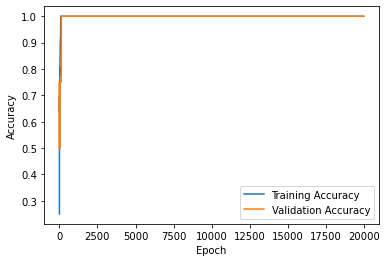

In [20]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 20000 # Number of EPOCHS

history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [21]:
loss, acc = model.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 1.000000
Testing Set Accuracy: 0.714286


## Question 1: Part2 

In [9]:
## for the learning rate of 0.001, epochs = 20000 and optimiser 2.)Adam
kernel_init1 = initializers.RandomNormal(seed=14)

model1 = Sequential()
model1.add(Dense(32, activation='relu', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init1))
model1.add(Dense(16, activation='relu', kernel_initializer=kernel_init1))
model1.add(Dense(3, activation=tf.nn.softmax))  # Output Layer


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #Adam optimiser



model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                608       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 51        
Total params: 1,187
Trainable params: 1,187
Non-trainable params: 0
_________________________________________________________________


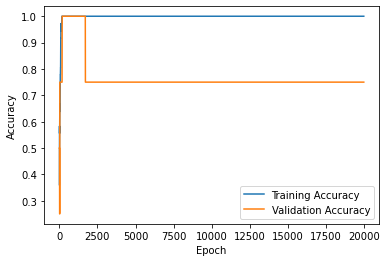

In [10]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 20000 # Number of EPOCHS

history = model1.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [11]:
loss, acc = model1.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model1.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 0.975000
Testing Set Accuracy: 0.571429


## Question 1: Part3 

In [14]:
## for the learning rate of 0.001, epochs = 20000 and optimiser 2.)Gradient Descent
kernel_init2 = initializers.RandomNormal(seed=14)

model2 = Sequential()
model2.add(Dense(32, activation='relu', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init2))
model2.add(Dense(16, activation='relu', kernel_initializer=kernel_init2))
model2.add(Dense(3, activation=tf.nn.softmax))  # Output Layer

#optimizer is modified based on the version 2.0 requirements
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001) #Gradient descennt optimiser



model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 51        
Total params: 1,187
Trainable params: 1,187
Non-trainable params: 0
_________________________________________________________________


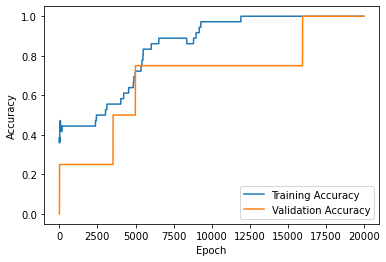

In [15]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') 


EPOCHS = 20000 

history = model2.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [17]:
loss, acc = model2.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model2.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 1.000000
Testing Set Accuracy: 0.714286


## Ques 2: For epochs 20000 and other default setup, run the model for Gradient Descent Optimizer for learning rate 0.01, 0.001 and 0.0001 and compare the accuracy vs. epochs.

In [18]:
## for the learning rate of 0.01, epochs = 20000 and optimiser 1.)Gradient Descent
kernel_init = initializers.RandomNormal(seed=14)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init))
model.add(Dense(16, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(3, activation=tf.nn.softmax))  # Output Layer


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) #Gradient descent optimiser



model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 51        
Total params: 1,187
Trainable params: 1,187
Non-trainable params: 0
_________________________________________________________________


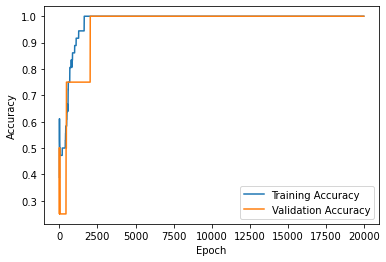

In [19]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 20000 # Number of EPOCHS

history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [20]:
loss, acc = model.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 1.000000
Testing Set Accuracy: 0.714286


## Question 2: Part2

In [28]:
## for the learning rate of 0.001, epochs = 20000 and optimiser 1.)Gradient Descent
'''We decreased the one layer network to increase the processing time of the model'''
kernel_init = initializers.RandomNormal(seed=14)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init))
#model.add(Dense(16, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(3, activation=tf.nn.softmax))  # Output Layer


optimizer = tf.keras.optimizers.SGD(learning_rate=0.001) #Gradient descent optimiser



model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 99        
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


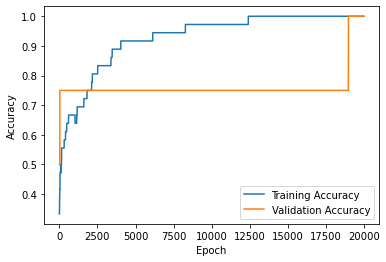

In [22]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 20000 # Number of EPOCHS

history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [23]:
loss, acc = model.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 1.000000
Testing Set Accuracy: 0.857143


## Question 2: Part 3

In [25]:
## for the learning rate of 0.0001, epochs = 20000 and optimiser 1.)Gradient Descent
kernel_init = initializers.RandomNormal(seed=14)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init))
#model.add(Dense(16, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(3, activation=tf.nn.softmax))  # Output Layer


optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001) #Gradient descent optimiser



model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 99        
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


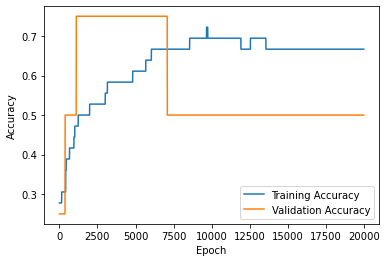

In [26]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 20000 # Number of EPOCHS

history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [27]:
loss, acc = model.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 0.650000
Testing Set Accuracy: 0.285714


## Ques 3: For learning rate 0.01, epochs 20000 and other default setup, run the model for Adam Optimizer for ReLU, tanh and softmax activation functions in the hidden layer and compare the accuracy vs. epochs.


In [29]:
## for the learning rate of 0.01, epochs = 20000 and optimiser 1.)Adam 1.) Activation function = ReLU
kernel_init = initializers.RandomNormal(seed=14)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init))
#model.add(Dense(16, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(3, activation=tf.nn.softmax))  # Output Layer


optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) #Adam optimiser



model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 99        
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


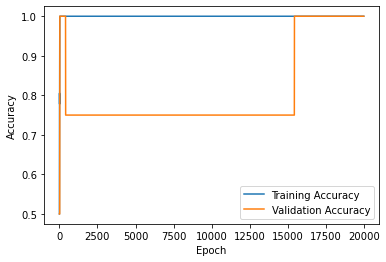

In [30]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 20000 # Number of EPOCHS

history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [31]:
loss, acc = model.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 1.000000
Testing Set Accuracy: 0.714286


## Question 3: Part2

In [32]:
## for the learning rate of 0.01, epochs = 20000 and optimiser 1.)Adam 1.) Activation function = tanh 
kernel_init = initializers.RandomNormal(seed=14)

model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init))
#model.add(Dense(16, activation='tanh', kernel_initializer=kernel_init))
model.add(Dense(3, activation=tf.nn.softmax))  # Output Layer


optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) #Adam optimiser



model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 99        
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


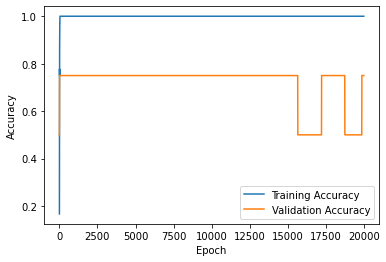

In [33]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 20000 # Number of EPOCHS

history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [34]:
loss, acc = model.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 0.975000
Testing Set Accuracy: 0.714286


## Question 3: part3 

In [35]:
## for the learning rate of 0.01, epochs = 20000 and optimiser 1.)Adam 1.) Activation function = tanh 
kernel_init = initializers.RandomNormal(seed=14)

model = Sequential()
model.add(Dense(32, activation='softmax', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init))
#model.add(Dense(16, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(3, activation=tf.nn.softmax))  # Output Layer


optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) #Adam optimiser



model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 99        
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


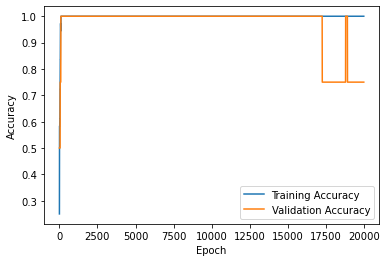

In [36]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 20000 # Number of EPOCHS

history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [37]:
loss, acc = model.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 0.975000
Testing Set Accuracy: 0.714286


#### MAKING PREDICTIONS

The last step in a Regression Model is to make predictions for values not in the training set, which are determined by the method [**predict**](https://keras.io/models/model/#predict). In the following cell we print the Elements in the testing set, the real values for their Young's Moduli and the predictions generated by the Machine Learning model.

In [38]:
train_predictions = model.predict(train_values)
test_predictions = model.predict(test_values)

all_labels = np.vstack((train_labels, test_labels))
all_predictions = np.vstack((train_predictions, test_predictions))

predicted_labels = []
true_labels = []

for i in range(all_predictions.shape[0]):
    if (np.argmax(all_predictions[i]) == 0):
        predicted_labels.append("FCC")
    if (np.argmax(all_labels[i]) == 0):
        true_labels.append("FCC")
    if (np.argmax(all_predictions[i]) == 1):
        predicted_labels.append("BCC")
    if (np.argmax(all_labels[i]) == 1):
        true_labels.append("BCC")
    if (np.argmax(all_predictions[i]) == 2):
        predicted_labels.append("HCP")
    if (np.argmax(all_labels[i]) == 2):
        true_labels.append("HCP")

predicted_labels = np.array(predicted_labels).reshape((-1, 1))
true_labels = np.array(true_labels).reshape((-1, 1))
headings = ["Atomic number", "True crystal structure", "Predicted crystal structure"]

atomic_number_array = np.array(df.iloc[:, 0]).reshape((-1, 1))
plot_table = np.concatenate((atomic_number_array, true_labels, predicted_labels), axis=1)

plot_df = pd.DataFrame(plot_table, columns=headings)

In [39]:
plot_df

,Atomic number,True crystal structure,Predicted crystal structure
0,27,HCP,HCP
1,69,HCP,HCP
2,39,HCP,HCP
3,75,HCP,HCP
4,28,FCC,FCC
5,67,HCP,HCP
6,79,FCC,FCC
7,21,HCP,HCP
8,45,FCC,FCC
9,74,BCC,BCC
